In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2
from PIL import Image
import glob as gb
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


from keras import Sequential , layers
from keras.layers import Conv2D , BatchNormalization , Dropout , MaxPool2D , Dense

## Load images

In [6]:
with_mask_path = os.listdir("D:\DL_Project\Face Mask Detection using Convolutional Neural Network (CNN)\data\with_mask")
print("number of image with mask is == ",len(with_mask_path))

number of image with mask is ==  3725


## Display the first 5 images with_mask

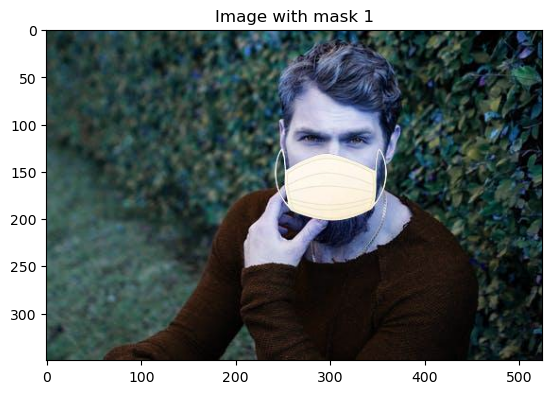

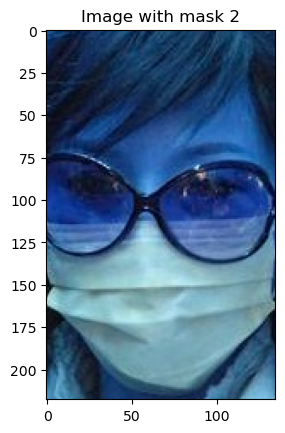

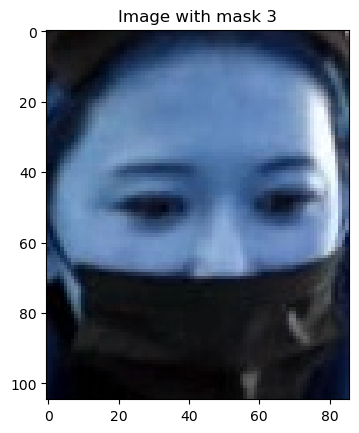

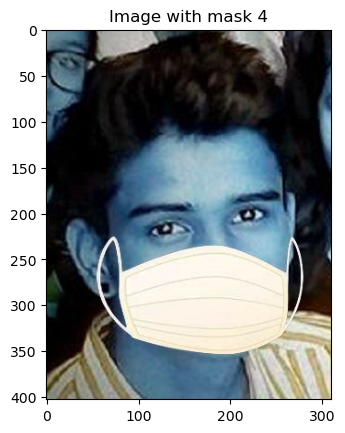

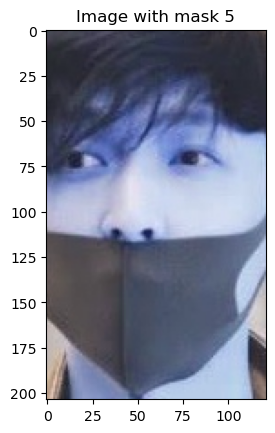

In [7]:
with_mask_path = "D:\DL_Project\Face Mask Detection using Convolutional Neural Network (CNN)\data\with_mask"

images_with_mask = []
for filename in os.listdir(with_mask_path):
    image_path = os.path.join(with_mask_path, filename)
    image = cv2.imread(image_path)  # Load the image
    images_with_mask.append(image)

# Display the first 5 images
for i in range(5):
    plt.imshow(images_with_mask[i], cmap="gray")
    plt.title(f"Image with mask {i+1}")
    plt.show()

In [9]:
without_mask_path = os.listdir("D:\DL_Project\Face Mask Detection using Convolutional Neural Network (CNN)\data\without_mask")
print("number of image without mask is == ",len(without_mask_path))

number of image without mask is ==  3828


## Display the first 5 images without_mask

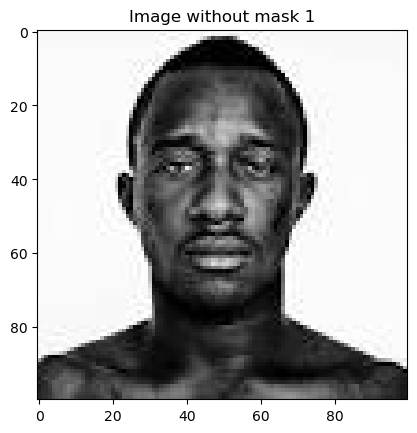

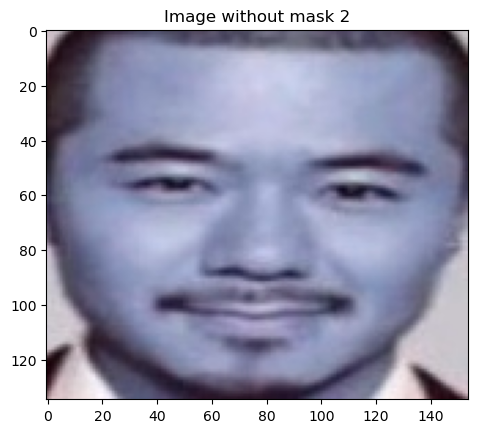

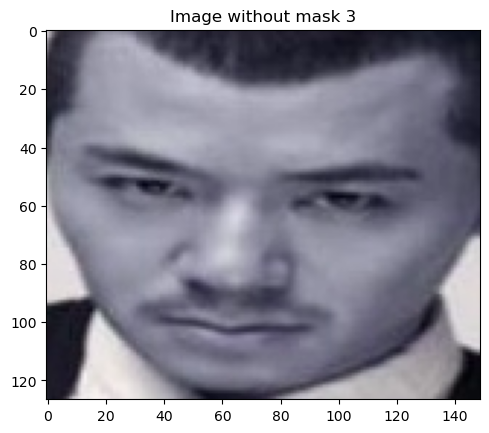

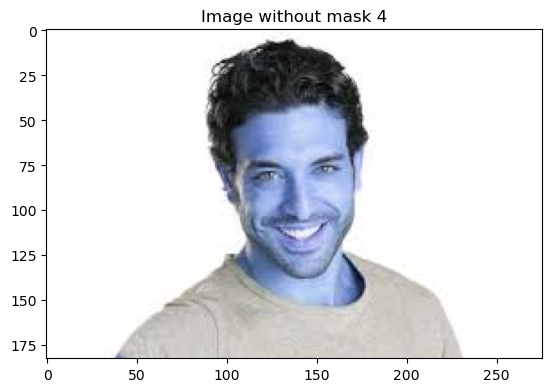

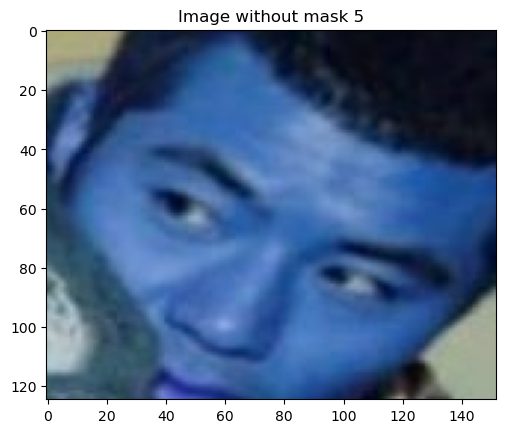

In [10]:
without_mask_path = "D:\DL_Project\Face Mask Detection using Convolutional Neural Network (CNN)\data\without_mask"

images_without_mask = []
for filename in os.listdir(without_mask_path):
    image_path = os.path.join(without_mask_path, filename)
    image = cv2.imread(image_path)  # Load the image
    images_without_mask.append(image)

# Display the first 5 images
for i in range(5):
    plt.imshow(images_without_mask[i], cmap="gray")
    plt.title(f"Image without mask {i+1}")
    plt.show()

## with mask --> 1

## without mask --> 0

In [11]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [12]:
print("labels of with mask is \n " , with_mask_labels[0:5])

print("labels of without mask is \n " , without_mask_labels[0:5])

labels of with mask is 
  [1, 1, 1, 1, 1]
labels of without mask is 
  [0, 0, 0, 0, 0]


In [13]:
print("Number of with mask is == " , len(with_mask_labels))
print("Number of without mask is == " , len(without_mask_labels))

Number of with mask is ==  3725
Number of without mask is ==  3828


In [14]:
labels = with_mask_labels + without_mask_labels

print( "Total labels is == " , len(labels))
print(labels[0:5])
print(labels[-5:])

Total labels is ==  7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


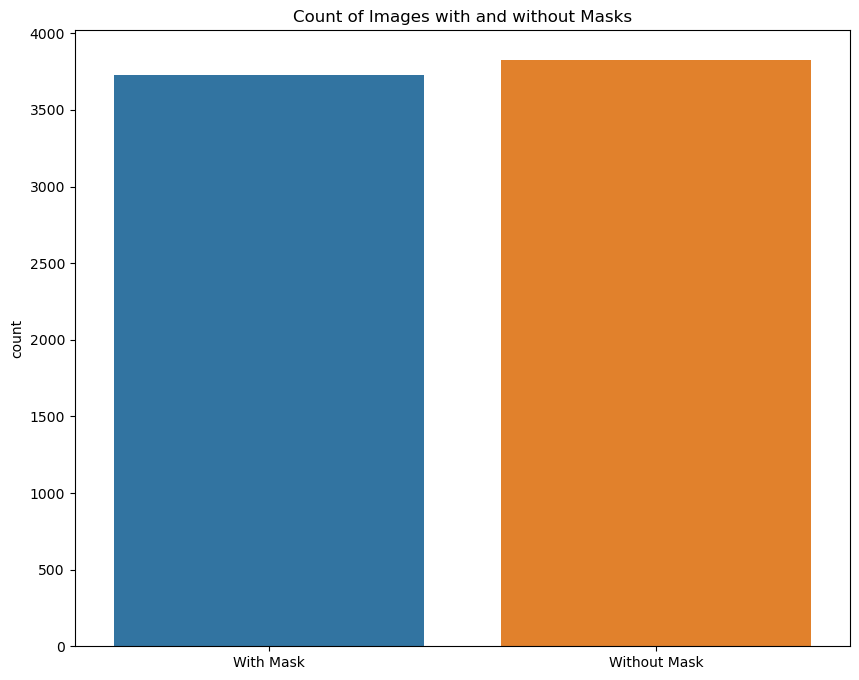

In [15]:
# Create a categorical variable indicating mask status
mask_status = ["With Mask"] * len(with_mask_labels) + ["Without Mask"] * len(without_mask_labels)
plt.figure(figsize=(10,8))
# Create the countplot
sns.countplot(x=mask_status)
plt.title("Count of Images with and without Masks")
plt.show()


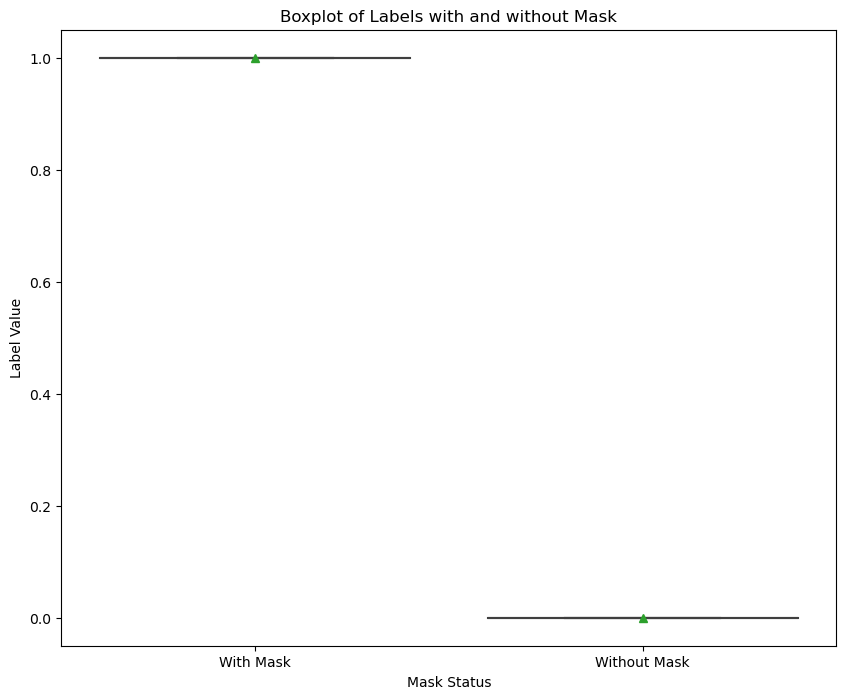

In [16]:
plt.figure(figsize=(10,8))
# Create the boxplot
sns.boxplot(x = "Mask Status", y = "Label", showmeans=True, data=pd.DataFrame({"Label": labels, "Mask Status": mask_status}))

# Customize the plot (optional)
plt.xlabel("Mask Status")
plt.ylabel("Label Value")
plt.title("Boxplot of Labels with and without Mask")

# Display the plot
plt.show()


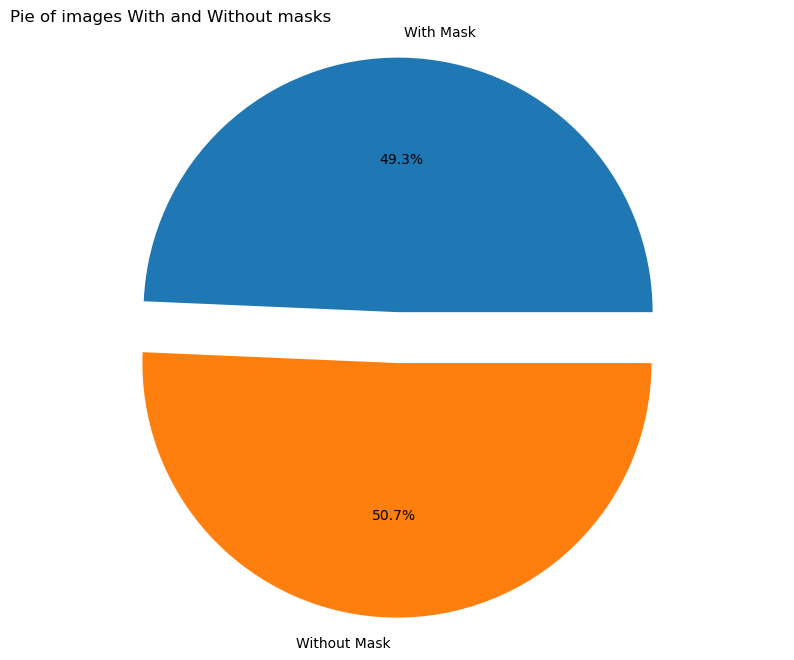

In [17]:
plt.figure(figsize=(10,8))
plt.pie((3725 , 3828) ,labels=["With Mask" , "Without Mask"] , explode=[0.1,0.1] ,autopct="%1.1f%%")
plt.axis("equal")
plt.title("Pie of images With and Without masks" , loc="left")
plt.show()

In [20]:
with_mask_path = "D:\DL_Project\Face Mask Detection using Convolutional Neural Network (CNN)\data\with_mask"

data = []

for img_file in os.listdir(with_mask_path):  # Iterate through files
    image_path = os.path.join(with_mask_path, img_file)
    image = Image.open(image_path)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

    
without_mask_path = "D:\DL_Project\Face Mask Detection using Convolutional Neural Network (CNN)\data\without_mask"

for img_file in os.listdir(without_mask_path):  # Iterate through files
    image_path = os.path.join(without_mask_path, img_file)
    image = Image.open(image_path)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [21]:
len(data)

7553

# Display (RGB) (With and Without Masks)

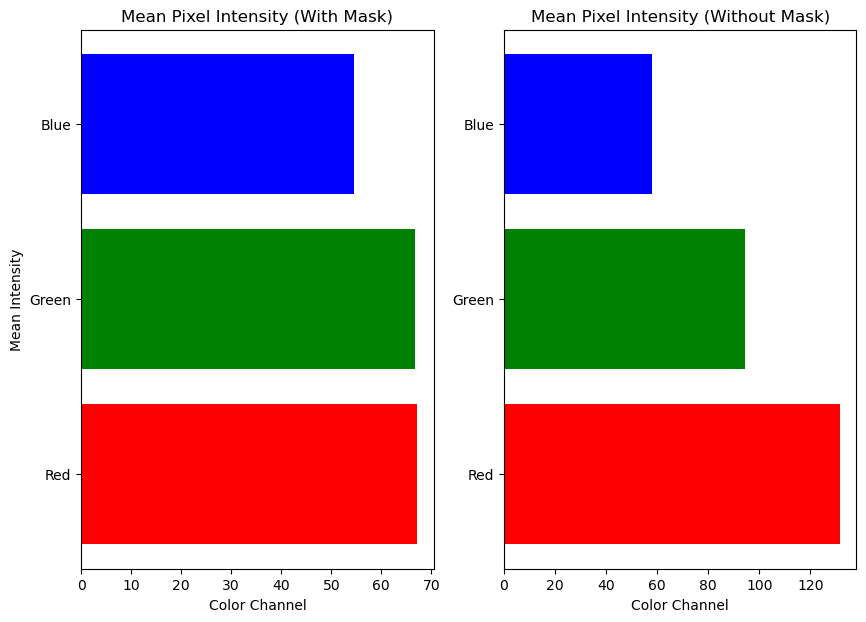

In [22]:

# Access images directly from the lists
images_with_mask = data[0]  # Images with masks 
images_without_mask = np.array(data[1])  # Images without masks

# Calculate mean pixel intensities for images with masks
mean_red_with_mask = np.mean(images_with_mask[:, :, 0])
mean_green_with_mask = np.mean(images_with_mask[:, :, 1])
mean_blue_with_mask = np.mean(images_with_mask[:, :, 2])

# Calculate mean pixel intensities for images without masks
mean_red_without_mask = np.mean(images_without_mask[:, :, 0])
mean_green_without_mask = np.mean(images_without_mask[:, :, 1])
mean_blue_without_mask = np.mean(images_without_mask[:, :, 2])

# Create separate bar plots for each mask status
plt.figure(figsize=(10, 7))
plt.subplot(121)  # First subplot for images with masks
plt.barh(['Red', 'Green', 'Blue'], [mean_red_with_mask, mean_green_with_mask, mean_blue_with_mask],
         color=['red', 'green', 'blue'])
plt.title('Mean Pixel Intensity (With Mask)')
plt.xlabel('Color Channel')
plt.ylabel('Mean Intensity')

plt.subplot(122)  # Second subplot for images without masks
plt.barh(['Red', 'Green', 'Blue'], [mean_red_without_mask, mean_green_without_mask, mean_blue_without_mask],
         color=['red', 'green', 'blue'])
plt.title('Mean Pixel Intensity (Without Mask)')
plt.xlabel('Color Channel')
plt.show()


In [23]:
len(data)

7553

In [24]:
X = np.array(data)
Y = np.array(labels)

In [25]:
Y.shape

(7553,)

In [26]:
X.shape

(7553, 128, 128, 3)

In [27]:
# Address inconsistencies (replace with appropriate actions based on your findings)
if len(X) != len(Y):
    # Handle extra samples in Y (example: remove them)
    Y = Y[:len(X)]

# Reshape arrays if necessary (example: if Y is a single column)
Y = Y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123, shuffle=True)

print("shape X_train is === ",X_train.shape)
print("shape X_test is === ",X_test.shape)
print("shape y_train is === ",y_train.shape)
print("shape y_test is === ",y_test.shape)

shape X_train is ===  (6042, 128, 128, 3)
shape X_test is ===  (1511, 128, 128, 3)
shape y_train is ===  (6042, 1)
shape y_test is ===  (1511, 1)


## Normalization 

In [28]:
X_train_scal = X_train / 255
X_test_scal = X_test / 255

In [30]:
num_of_classes = 2

model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(num_of_classes, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [32]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
history = model.fit(X_train_scal , y_train , validation_split=0.1 , epochs=8)
history

Epoch 1/8
170/170 [==============================] - 39s 227ms/step - loss: 0.1503 - accuracy: 0.9395 - val_loss: 0.1696 - val_accuracy: 0.9322
Epoch 2/8
170/170 [==============================] - 38s 223ms/step - loss: 0.1237 - accuracy: 0.9529 - val_loss: 0.1583 - val_accuracy: 0.9289
Epoch 3/8
170/170 [==============================] - 38s 222ms/step - loss: 0.1040 - accuracy: 0.9625 - val_loss: 0.2264 - val_accuracy: 0.9207
Epoch 4/8
170/170 [==============================] - 38s 225ms/step - loss: 0.0921 - accuracy: 0.9663 - val_loss: 0.2377 - val_accuracy: 0.9289
Epoch 5/8
170/170 [==============================] - 115s 681ms/step - loss: 0.0900 - accuracy: 0.9673 - val_loss: 0.2803 - val_accuracy: 0.9124
Epoch 6/8
170/170 [==============================] - 44s 258ms/step - loss: 0.0730 - accuracy: 0.9741 - val_loss: 0.2323 - val_accuracy: 0.9207
Epoch 7/8
170/170 [==============================] - 41s 239ms/step - loss: 0.0802 - accuracy: 0.9741 - val_loss: 0.2179 - val_accuracy

In [44]:
loss, accuracy = model.evaluate(X_test_scal, y_test)
print('Test Accuracy =', accuracy)
print('Test loss =', loss)

48/48 [==============================] - 2s 42ms/step - loss: 0.2783 - accuracy: 0.9351
Test Accuracy = 0.9351422786712646
Test loss = 0.2783186733722687


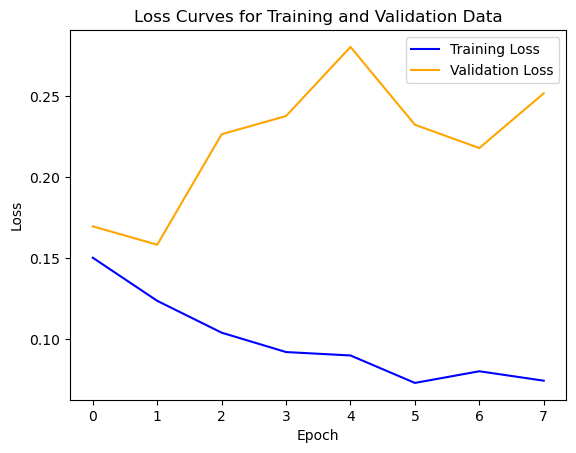

In [45]:
# Plot the loss curves with clear labels and colors
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.title("Loss Curves for Training and Validation Data")
plt.ylabel("Loss")
plt.xlabel("Epoch")

# Place the legend in a suitable location
plt.legend(loc="upper right")

# Display the plot
plt.show()


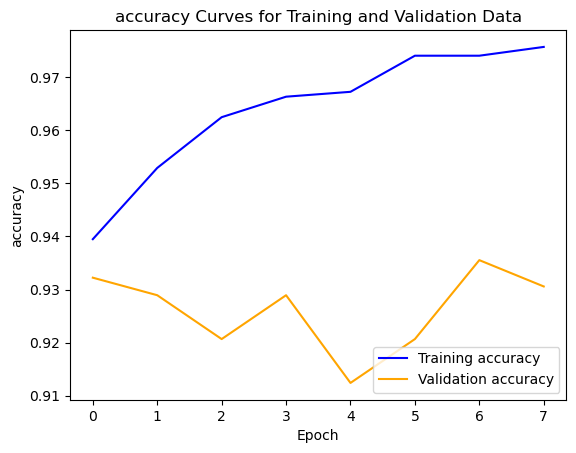

In [46]:
# Plot the loss curves with clear labels and colors
plt.plot(history.history["accuracy"], label="Training accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation accuracy", color="orange")
plt.title("accuracy Curves for Training and Validation Data")
plt.ylabel("accuracy")
plt.xlabel("Epoch")

# Place the legend in a suitable location
plt.legend(loc="lower right")

# Display the plot
plt.show()


Path of the image to be predicted: D:\DL_Project\Face Mask Detection using Convolutional Neural Network (CNN)\data\with_mask\with_mask_6.jpg
1/1 [==============================] - 0s 26ms/step
[[0.48853722 0.5203831 ]]
1
The person in the image is wearing a mask


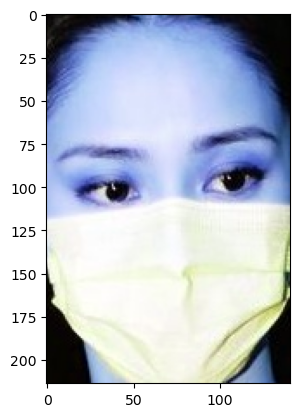

In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:
    print('The person in the image is wearing a mask')

else:
    print('The person in the image is not wearing a mask')

Path of the image to be predicted: D:\DL_Project\Face Mask Detection using Convolutional Neural Network (CNN)\data\without_mask\without_mask_1.jpg
1/1 [==============================] - 0s 27ms/step
[[0.55652946 0.49896482]]
0
The person in the image is not wearing a mask


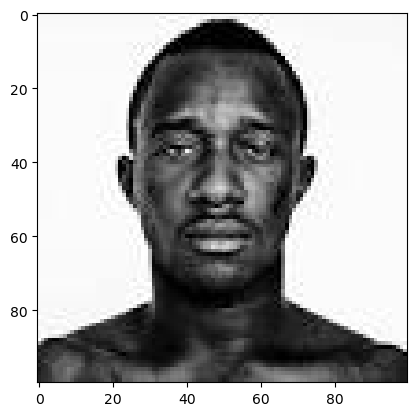

In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:
    print('The person in the image is wearing a mask')

else:
    print('The person in the image is not wearing a mask')

# END

# BY : SAYED ALI